In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%run 1_cleaning_data.ipynb
data = data

In [37]:
from mlxtend.frequent_patterns import apriori,association_rules
import networkx as nx

In [11]:
#market basket analysis
#used in retail to understand association between products
basket = data.groupby(['Order ID','Product'])[
    'Quantity Ordered'].sum().unstack(
    ).reset_index().fillna(0).set_index('Order ID')
basket

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
Order ID,,,,,,,,,,,,,,,,,,,
141234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
141235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
141236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
141237,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
319667,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
319668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
# convert the quantities to binary values 0or1
basket = basket.map(lambda x: 1 if x>0 else 0)
basket

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
Order ID,,,,,,,,,,,,,,,,,,,
141234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
141235,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
141236,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
141237,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
141238,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319666,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
319667,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
319668,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [30]:
#Use the Apriori Algorithm
#from mlxtend.frequent_patterns imort apriori
frequent_itemsets =  apriori(basket, min_support=0.001, use_colnames=True)
frequent_itemsets


,support,itemsets
0,0.022966,(20in Monitor)
1,0.034886,(27in 4K Gaming Monitor)
2,0.042020,(27in FHD Monitor)
3,0.034600,(34in Ultrawide Monitor)
4,0.115122,(AA Batteries (4-pack))
5,0.115408,(AAA Batteries (4-pack))
6,0.087005,(Apple Airpods Headphones)
7,0.074525,(Bose SoundSport Headphones)
8,0.026867,(Flatscreen TV)
9,0.030946,(Google Phone)


In [38]:
rules = association_rules(
    frequent_itemsets, metric='lift', min_threshold =0.75)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Google Phone),(USB-C Charging Cable),0.030946,0.122480,0.005587,0.180551,1.474120,0.001797,1.070865,0.331900
1,(USB-C Charging Cable),(Google Phone),0.122480,0.030946,0.005587,0.045619,1.474120,0.001797,1.015374,0.366521
2,(iPhone),(Lightning Charging Cable),0.038333,0.121074,0.005666,0.147807,1.220804,0.001025,1.031370,0.188077
3,(Lightning Charging Cable),(iPhone),0.121074,0.038333,0.005666,0.046797,1.220804,0.001025,1.008880,0.205782
4,(USB-C Charging Cable),(Vareebadd Phone),0.122480,0.011573,0.002062,0.016838,1.454996,0.000645,1.005356,0.356360
5,(Vareebadd Phone),(USB-C Charging Cable),0.011573,0.122480,0.002062,0.178208,1.454996,0.000645,1.067813,0.316374


In [39]:
#creating graph for rules
G = nx.from_pandas_edgelist(rules, source='antecedents', target='consequents', edge_attr=True )

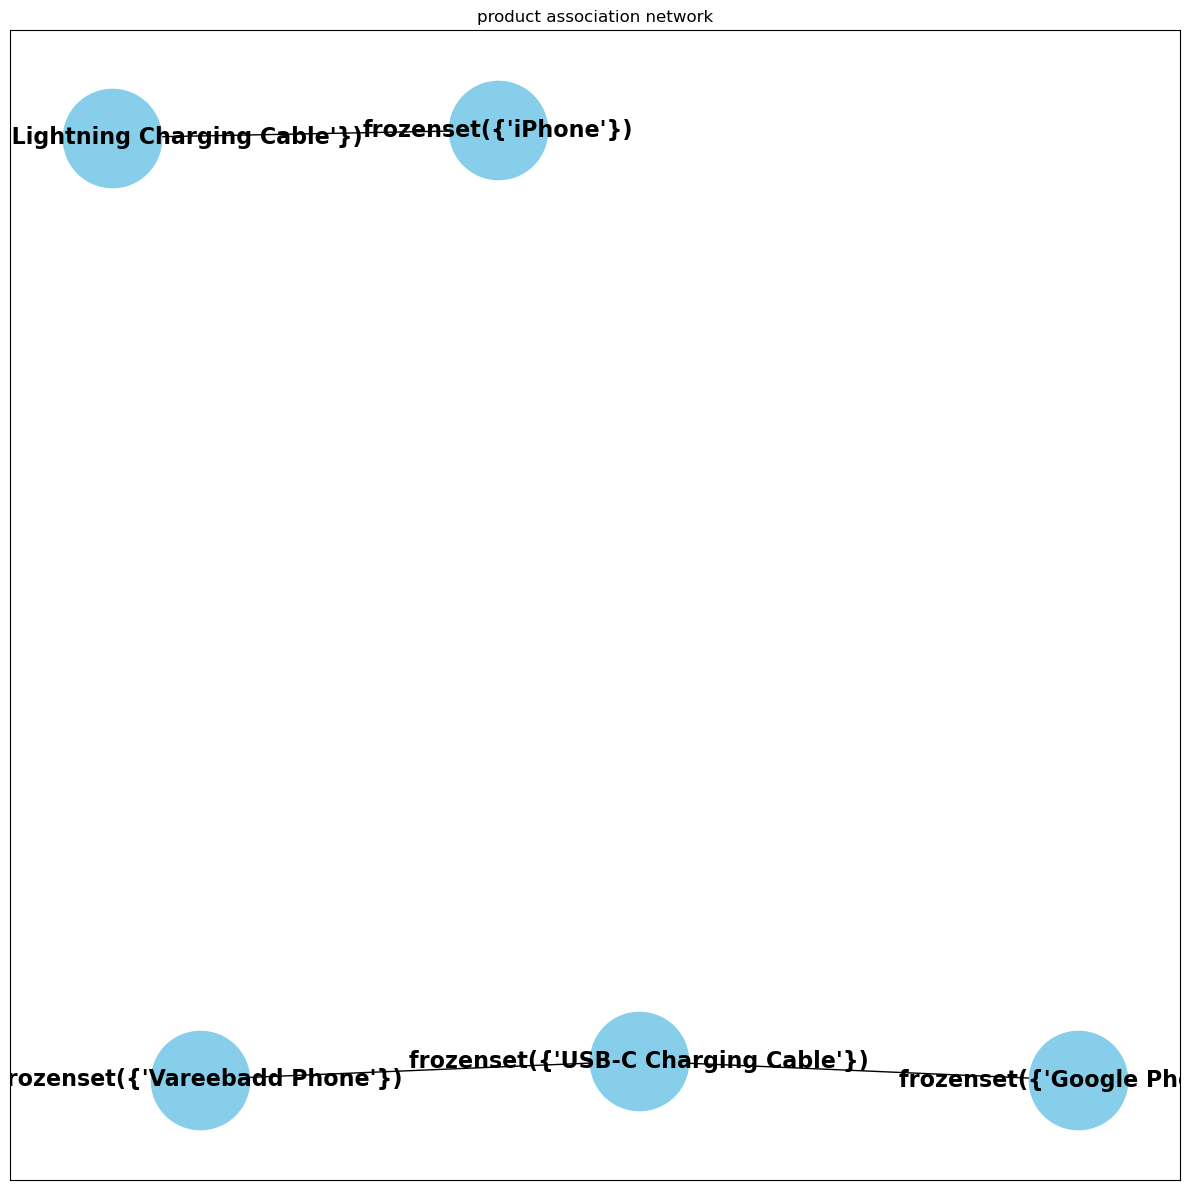

In [55]:
plt.figure(figsize=(12,12))
nx.draw_networkx(G, with_labels=True, node_size = 5000, node_color='skyblue',font_size=16, font_color='black', font_weight='bold')

plt.title('product association network')
plt.tight_layout()
plt.show()